# Minimum to mean classifier

## Minimum to mean classifier Explanation

This is a simple classifier that uses the minimum to mean ratio to classify a sample. It is a simple classifier that is used to demonstrate the use of the `sklearn` library.

Basically the classifier calculates the ratio of the minimum value of the sample to the mean value of the sample. If the ratio is less than a threshold, the sample is classified as a 1, otherwise it is classified as a 0.

The mean is calculated as:
$$ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $$

Where $n$ is the number of elements in the sample and $x_i$ is the $i$th element of the sample.

And we calculate the euclidean distance as:

$$ d = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$

Where $x_i$ is the $i$th element of the sample and $y_i$ is the $i$th element of the mean.

After calculating the distance, we calculate the ratio as:

$$ r = \frac{d}{\mu} $$

If the ratio is less than the threshold, the sample is classified as a 1, otherwise it is classified as a 0.

## Minimum to mean classifier Implementation

The algorithm to implement the classifier for a binary classification problem is as follows:

1. Divide in two sets, X1 containing the samples with label 1 and X0 containing the samples with label 0.

2. Calculate the mean of each set, $\mu_1$ and $\mu_0$.

3. Calculate the distance of each sample to the mean of its set, $d_1$ and $d_0$.

4. Verify if a value $r_1 = \frac{d_1}{\mu_1}$ is less than a threshold $t$. If it is, the sample is classified as a 1, otherwise it is classified as a 0.

In [1956]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


In [1957]:
X,y = make_blobs(n_samples=200, centers= 2, )

In [1958]:
X.shape

(200, 2)

In [1959]:
y.shape

(200,)

In [1960]:
np.unique(y)

array([0, 1])

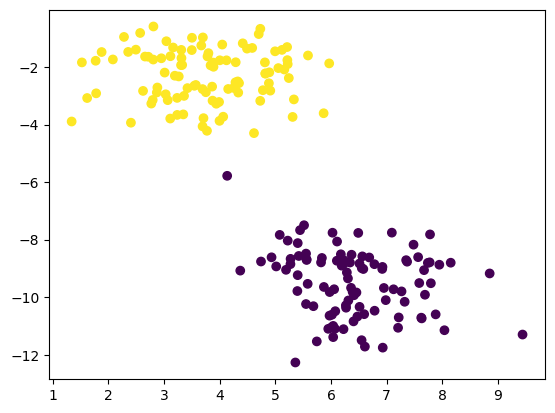

In [1961]:
plt.scatter(X[:,0], X[:,1], c=y)

In [1962]:
idx = y == 0

In [1963]:
X1 = X[idx, :]

In [1964]:
X1.shape

(100, 2)

In [1965]:
X2 = X[~idx, :]

In [1966]:
mean_class1 = X1.mean(axis=0)

In [1967]:
mean_class1

array([ 6.42640676, -9.49152389])

In [1968]:
mean_class2 = X2.mean(axis=0)

In [1969]:
mean_class2

array([ 3.74936701, -2.30820971])

In [1970]:
idx = np.random.randint(y.size) # 0 is -1 and 1 is 1

r = X[idx, :]

d1 = np.sqrt(np.sum((r - mean_class1)**2))
d2 = np.sqrt(np.sum((r - mean_class2)**2))

r = y[idx] if d1 < d2 else 1 - y[idx]

print(f'This point belongs to class {r}\nAnd the real class is {y[idx]}')

This point belongs to class 0
And the real class is 0


In [1971]:
X,y = make_blobs(n_samples=10, centers= 2, )


In [1972]:
X

array([[-6.35444616,  8.09930646],
       [ 6.61986524, -6.39697498],
       [ 3.46711895, -5.48177918],
       [-6.47372226,  6.52139877],
       [-7.6959488 ,  5.3697523 ],
       [ 4.89711139, -3.82875684],
       [-7.78387551,  4.35989056],
       [ 6.54572093, -5.60978039],
       [ 4.1165893 , -5.86743945],
       [-7.63385203,  6.50986652]])

In [1973]:
y

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [1974]:
X.shape

(10, 2)

In [1975]:
y.shape

(10,)

In [1976]:
idx = y == 0

X1 = X[idx, :]

In [1977]:
X1.shape

(5, 2)

In [1978]:
X2 = X[~idx, :]
X2.shape

(5, 2)

In [1979]:
X1

array([[-6.35444616,  8.09930646],
       [-6.47372226,  6.52139877],
       [-7.6959488 ,  5.3697523 ],
       [-7.78387551,  4.35989056],
       [-7.63385203,  6.50986652]])

In [1980]:
X2

array([[ 6.61986524, -6.39697498],
       [ 3.46711895, -5.48177918],
       [ 4.89711139, -3.82875684],
       [ 6.54572093, -5.60978039],
       [ 4.1165893 , -5.86743945]])

In [1981]:
mean_class1 = X1.mean(axis=0)
mean_class2 = X2.mean(axis=0)

In [1982]:
mean_class1

array([-7.18836895,  6.17204292])

In [1983]:
mean_class2

array([ 5.12928116, -5.43694617])

In [1984]:
r = np.random.randint(y.size)
r

4

In [1985]:
idx = X[r, :]
idx

array([-7.6959488,  5.3697523])

In [1986]:
euc_dist_class1 = np.sqrt(np.sum((idx - mean_class1)**2))
euc_dist_class1

0.9493721814557302

In [1987]:
euc_dist_class2 = np.sqrt(np.sum((idx - mean_class2)**2))
euc_dist_class2

16.771143533700734

In [1988]:
y_pred = y[r] if euc_dist_class1 < euc_dist_class2 else 1 - y[r]
print(f'This point belongs to class {y_pred}\nAnd the real class is {y[r]}')

This point belongs to class 0
And the real class is 0
